<h1> 나랑 닮은 연예인은 누구? <h1>

학습목표

1.임베딩에 대해 이해하고 얼굴의 임베딩 벡터를 추출합니다.

2.얼굴의 임베딩 벡터로 닮은 꼴인 얼굴을 찾습니다.

3.나와 가까운 연예인을 찾아냅니다.

데이터 준비하기

$ mkdir -p ~/aiffel/EXPLORATION/05/face_embedding

$ ln -s ~/data ~/aiffel/EXPLORATION/05/face_embedding/images

샘플이미지들을 matplotlib로 확인

file_list: ['obama.jpg', 'biden.jpg', 'clinton.jpeg', 'bush.jpeg', 'trump.jpg', 'reagan.jpg']


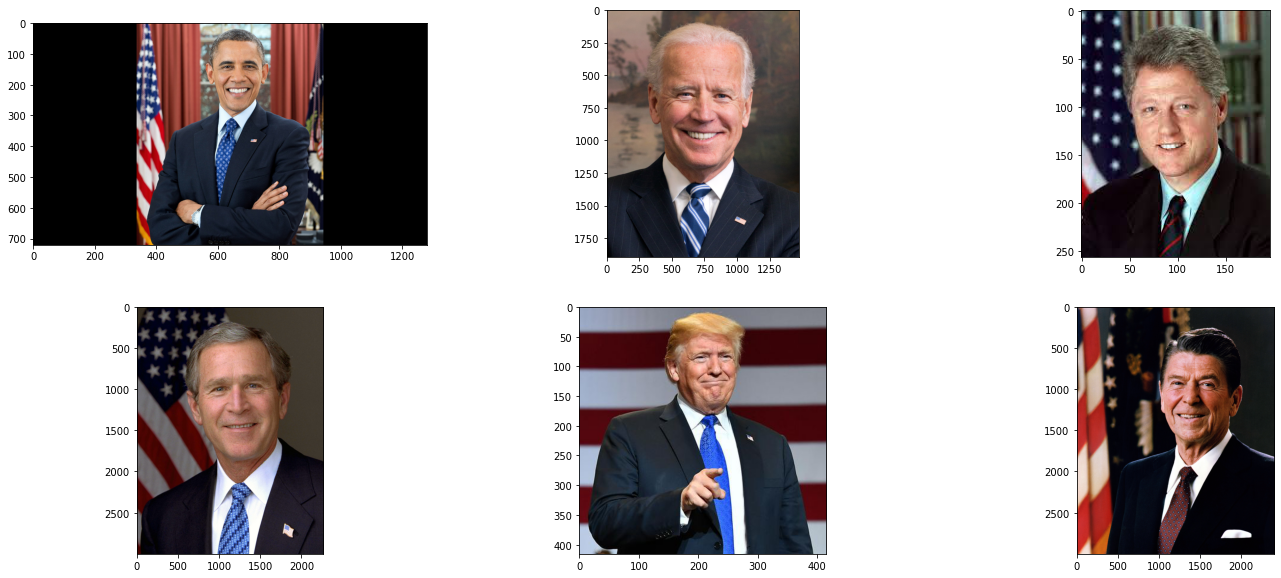

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/EXPLORATION/05/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

얼굴 영역 탐지

[(98, 758, 284, 572)]


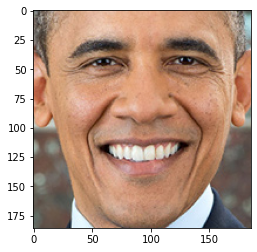

In [2]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/EXPLORATION/05/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

얼굴영역만 찾아오는 함수 만들기

In [3]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

trump.jpg의 얼굴 영역 테스트

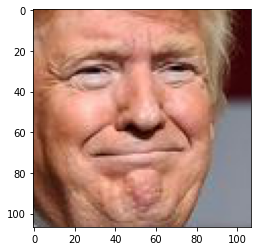

In [4]:
image_path = os.getenv('HOME')+'/aiffel/EXPLORATION/05/face_embedding/images/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

 images 디렉토리 file_list

In [5]:
import os

dir_path = os.getenv('HOME')+'/aiffel/EXPLORATION/05/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['obama.jpg', 'biden.jpg', 'clinton.jpeg', 'bush.jpeg', 'trump.jpg', 'reagan.jpg']


obama.jpg에 포함된 얼굴 영역의 임베딩 벡터 구하기

In [6]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
        -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
         0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
         0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
         0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
        -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
        -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
        -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
        -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
         0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
         0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
        -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
         0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
         0.10299795, -0.12437531, -0.0490516 ,  0.1

get_face_embedding_dict 함수 만들기


In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

get_face_embedding_dict() 함수 체크

In [8]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
        0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
        0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
        0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
       -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
       -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
        0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
        0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
       -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
       -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
       -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
       -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
        0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
        0.05921567, -0.06115703, -0.11171092,  0.23917492, -0.15

얼굴임베딩 사이의 거리측정

In [9]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.8885117374787042

얼굴임베딩 공간의 시각화

먼저 PCA 는 주성분 분석이라는 방법으로 Principal Component Analysis 의 준말입니다. 

이 방법은 모든 차원의 축에 따른 값의 변화도인 분산(Variance)을 확인한 뒤 그 중 변화가 가장 큰 주요한 축을 남기는 방법입니다.

T-SNE 는 고차원 상에서 먼 거리를 저차원 상에서도 멀리 배치되도록 차원을 축소하는 방식입니다. 

먼저 random하게 목표하는 차원에 데이터들을 배치한 후 각 데이터들을 고차원 상에서의 배치와 비교를 하면서 위치를 변경해 주는 알고리즘으로 이해하시면 됩니다.

가장 닮은꼴 얼굴 찾아보기

def get_cropped_face(image_file) : 이미지 파일에서 얼굴 영역을 가져오는 함수

def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수

def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

def get_distance(name1, name2) : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수

In [10]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('trump')


# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))


def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
            
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('obama')

순위 1 : 이름(biden), 거리(0.846720652777963)
순위 2 : 이름(bush), 거리(0.8639189288560225)
순위 3 : 이름(reagan), 거리(0.8692435806803928)
순위 4 : 이름(trump), 거리(0.8885117374787042)
순위 5 : 이름(clinton), 거리(0.9000994624487408)


<h3>프로젝트 : 나랑 닮은 연예인을 찾아보자<h3>

Step1. 사진 모으기

다운 받은 celebrity.zip을

~/aiffel/EXPLORATION/05/face_embedding에 업로드후 unzip 완료

개인사진 2장 업로드 완료

Step2. 얼굴 영역 자르기

샘플이미지들을 matplotlib로 확인

file_list: ['강동원.jpg', '유재석.jpg', '장원준.jpeg', '슈가.jpg', '이민호.jpeg', '류승범.jpg', '김종서.jpg', '문재인.jpeg', '김대중.jpg', '유희열.jpeg', '김구라.jpg', '화사.jpg', '황정민.jpg', '주호민.jpeg', '김연우.jpeg', 'Mulder.JPG', '티파니.jpg', 'obama.jpg', '강미나.jpg', 'trump.jpg', '온앤오프라운.jpg', '켄 정.jpeg', '효정.jpg', '최양락.jpg', '리아.jpg', '아이즈원조유리.jpeg', '슬리피.jpg', '손예진.jpeg', '이안 굿펠로우.jpg', '잭 블랙.jpeg', '케빈 스페이시.jpeg', '조정석.jpg', '박건우.png', '유노윤호.jpg', '김영삼.jpeg', '박보영.jpg', '수지.jpg', '첸.jpg', '길.jpg', '손흥민.jpg', '윤경신.jpg', '강민경.jpg', '제프리 힌턴.jpg', '박진영.jpg', '한석규.jpg', '이근대위.jpeg', '백현.jpg', '서현진.jpg', '트와이스모모.jpeg', '차명석.jpg', '봉준호.jpg', '장도연.jpg', '슬기.jpg', '김C.jpeg', '온앤오프효진.jpg', '온앤오프와이엇.jpg', '이승기.jpeg', 'clinton.jpeg', '공유.jpg', '김민재.jpeg', '케이.jpg', 'b1a4진영.jpeg', '트와이스미나.jpg', '꽈두룹.jpeg', '성시경.jpg', '유해진.jpg', '조이.jpg', '야마다 타카유키.jpeg', '정형돈.jpg', '최준석.jpg', '민니.jpg', 'RM.jpg', '박찬호.jpg', '로다주.jpeg', '권태원.jpeg', '찬열.jpeg', '김윤석.jpeg', '이성민.jpg', '로저 무어.jpeg', '잇지예지.jpeg', '박찬욱.jpeg', '리사.jpg', '철면수심.jpg', '문별.jpg',

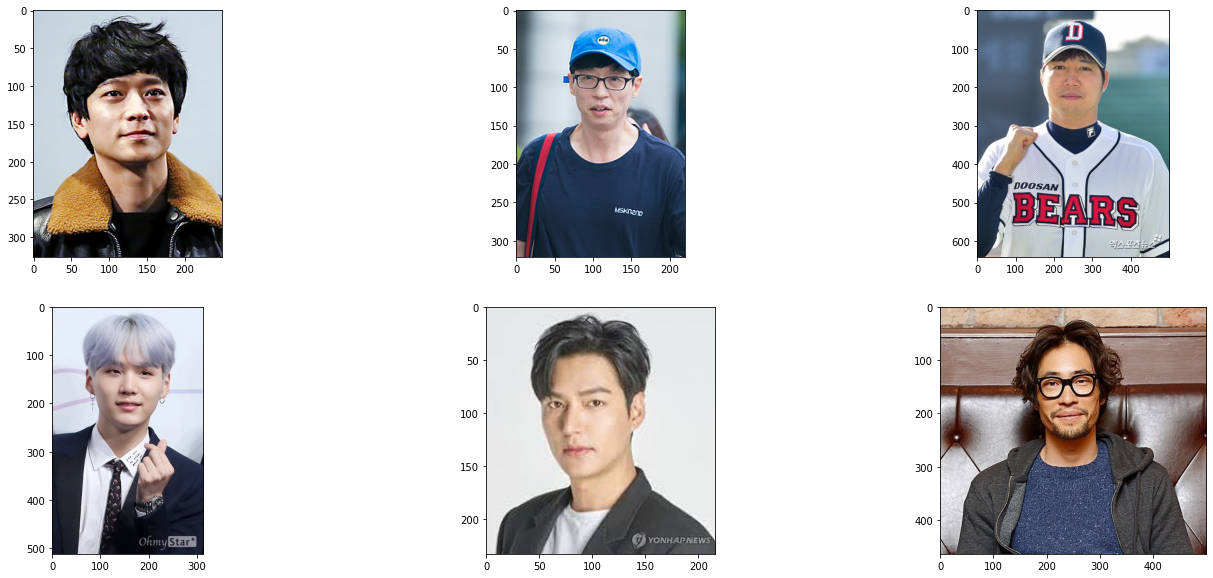

In [11]:
#    힌트
#    from PIL import Image
#    face = get_cropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)


import os

dir_path = os.getenv('HOME')+'/aiffel/EXPLORATION/05/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

얼굴 영역 탐지

[(98, 758, 284, 572)]


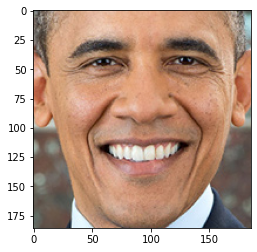

In [12]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/EXPLORATION/05/face_embedding/celebrity/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

얼굴영역만 찾아오는 함수 만들기

In [13]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

트와이스쯔위.jpg의 얼굴 영역 테스트

/aiffel/aiffel/EXPLORATION/05/face_embedding/celebrity/트와이스쯔위.jpg


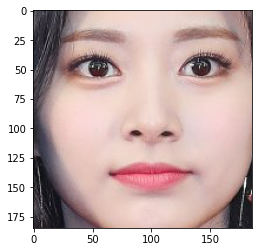

In [14]:
image_path = os.getenv('HOME')+'/aiffel/EXPLORATION/05/face_embedding/celebrity/트와이스쯔위.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)
print(image_path)

celebrity 디렉토리 file_list

In [16]:
import os

dir_path = os.getenv('HOME')+'/aiffel/EXPLORATION/05/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['강동원.jpg', '유재석.jpg', '장원준.jpeg', '슈가.jpg', '이민호.jpeg', '류승범.jpg', '김종서.jpg', '문재인.jpeg', '김대중.jpg', '유희열.jpeg', '김구라.jpg', '화사.jpg', '황정민.jpg', '주호민.jpeg', '김연우.jpeg', 'Mulder.JPG', '티파니.jpg', 'obama.jpg', '강미나.jpg', 'trump.jpg', '온앤오프라운.jpg', '켄 정.jpeg', '효정.jpg', '최양락.jpg', '리아.jpg', '아이즈원조유리.jpeg', '슬리피.jpg', '손예진.jpeg', '이안 굿펠로우.jpg', '잭 블랙.jpeg', '케빈 스페이시.jpeg', '조정석.jpg', '박건우.png', '유노윤호.jpg', '김영삼.jpeg', '박보영.jpg', '수지.jpg', '첸.jpg', '길.jpg', '손흥민.jpg', '윤경신.jpg', '강민경.jpg', '제프리 힌턴.jpg', '박진영.jpg', '한석규.jpg', '이근대위.jpeg', '백현.jpg', '서현진.jpg', '트와이스모모.jpeg', '차명석.jpg', '봉준호.jpg', '장도연.jpg', '슬기.jpg', '김C.jpeg', '온앤오프효진.jpg', '온앤오프와이엇.jpg', '이승기.jpeg', 'clinton.jpeg', '공유.jpg', '김민재.jpeg', '케이.jpg', 'b1a4진영.jpeg', '트와이스미나.jpg', '꽈두룹.jpeg', '성시경.jpg', '유해진.jpg', '조이.jpg', '야마다 타카유키.jpeg', '정형돈.jpg', '최준석.jpg', '민니.jpg', 'RM.jpg', '박찬호.jpg', '로다주.jpeg', '권태원.jpeg', '찬열.jpeg', '김윤석.jpeg', '이성민.jpg', '로저 무어.jpeg', '잇지예지.jpeg', '박찬욱.jpeg', '리사.jpg', '철면수심.jpg', '문별.jpg',

Step3. 얼굴 영역의 임베딩 추출하기

트와이스쯔위.jpg에 포함된 얼굴 영역의 임베딩 벡터 구하기

def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수

def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [17]:
image_file = os.path.join(dir_path, '트와이스쯔위.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08503913,  0.05339235, -0.0210684 , -0.1356775 , -0.12075399,
        -0.02808633, -0.13901651, -0.13329841,  0.14367411, -0.17938514,
         0.15284088, -0.13001588, -0.18477006, -0.01977227, -0.05317479,
         0.20943433, -0.18911953, -0.18346888,  0.01638073, -0.02299795,
         0.05500276,  0.07341196, -0.00813935,  0.07595769, -0.11132079,
        -0.35264325, -0.14276713, -0.08032959, -0.07439233, -0.05099743,
         0.0026018 ,  0.05788177, -0.17239656,  0.04172959,  0.07261831,
         0.14638646,  0.01944176, -0.09445627,  0.11371475,  0.00313581,
        -0.27524492,  0.01778929,  0.13258576,  0.2252367 ,  0.14784616,
         0.00464134, -0.03439566, -0.18541878,  0.11467966, -0.08282153,
         0.06206298,  0.12760551,  0.0367522 ,  0.05419404,  0.04277163,
        -0.10903599,  0.10172778,  0.16510487, -0.17837015, -0.02172793,
         0.11634788, -0.05209531,  0.01823161, -0.09128802,  0.24091634,
         0.12508942, -0.06674574, -0.27513877,  0.1

get_face_embedding_dict 함수 만들기

In [18]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict


get_face_embedding_dict() 함수 체크

나의 얼굴 임베딩 값 출력해보기

In [19]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['Mulder.JPG']

KeyError: 'Mulder.JPG'

KeyError가 뭘까?

In [20]:
embedding_dict['김유식.jpg']

KeyError: '김유식.jpg'

내 사진에서만... 나오는 에러인가?

In [21]:
embedding_dict['레드벨벳웬디.jpg']

KeyError: '레드벨벳웬디.jpg'

임베딩된 이미지가 딕셔너리에... 추가가 안되어 발생하는 오류인것 같다...

다시 get_face_embedding_dict 함수 만들기

In [22]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file) # 경로를 병합하여 새 경로 생성
        try: 
            face = get_cropped_face(img_path)    # 얼굴 영역만 자른 이미지
        except:                                  # 인식하지 못하는 이미지는 넘어감
            continue
            
        embedding = get_face_embedding(face)   # 얼굴 영역에서 얼굴 임베딩 벡터를 추출
        if len(embedding) > 0:   # 얼굴 영역이 제대로 detect되지 않았을 경우를 대비
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담긴다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
       
    return embedding_dict

다시 테스트....

In [23]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['레드벨벳웬디.jpg']

KeyError: '레드벨벳웬디.jpg'

KeyError Traceback (most recent call last) 에러에... 대해서 찾아보니.. 

dictrionary 안에 해당하는 Key가 없기 때문이라고 한다... 딕셔너리를... 열어보자...

In [24]:
list(embedding_dict.keys())

['강동원',
 '유재석',
 '장원준',
 '슈가',
 '이민호',
 '류승범',
 '김종서',
 '문재인',
 '김대중',
 '유희열',
 '김구라',
 '화사',
 '황정민',
 '주호민',
 '김연우',
 'Mulder',
 '티파니',
 'obama',
 '강미나',
 'trump',
 '온앤오프라운',
 '켄 정',
 '효정',
 '최양락',
 '리아',
 '아이즈원조유리',
 '슬리피',
 '손예진',
 '이안 굿펠로우',
 '잭 블랙',
 '케빈 스페이시',
 '조정석',
 '박건우',
 '유노윤호',
 '김영삼',
 '박보영',
 '수지',
 '첸',
 '길',
 '손흥민',
 '윤경신',
 '강민경',
 '박진영',
 '한석규',
 '이근대위',
 '백현',
 '서현진',
 '트와이스모모',
 '차명석',
 '봉준호',
 '장도연',
 '슬기',
 '김C',
 '온앤오프효진',
 '온앤오프와이엇',
 '이승기',
 'clinton',
 '공유',
 '김민재',
 '케이',
 'b1a4진영',
 '트와이스미나',
 '꽈두룹',
 '성시경',
 '유해진',
 '조이',
 '야마다 타카유키',
 '정형돈',
 '최준석',
 '민니',
 'RM',
 '박찬호',
 '로다주',
 '권태원',
 '찬열',
 '김윤석',
 '이성민',
 '로저 무어',
 '잇지예지',
 '박찬욱',
 '리사',
 '철면수심',
 '문별',
 '윤종신',
 '백윤식',
 '박해일',
 '류현진',
 '대도서관',
 '이영하',
 '박항서',
 '이대호',
 '이천수',
 '류승룡',
 '도지한',
 '오재원',
 '최현석',
 '권현빈',
 '김상호',
 '개코',
 '조정치',
 '심수창',
 '고창석',
 '공효진',
 '차범근',
 '앤드류 응',
 '박서준',
 '박보검',
 '레드벨벳웬디',
 '김경진',
 '트와이스쯔위',
 '이정재',
 '안재홍',
 '세훈',
 '무라니시',
 '사쿠라',
 '디오',
 '러블리즈지수',
 '지디',
 '이효리',
 '이준혁

오 갓..... 키 값이... 파일명만 이었다... 확장자는 필요 없었다....

In [25]:
embedding_dict['레드벨벳웬디']

array([-1.02295160e-01,  1.03428230e-01,  1.97550114e-02, -8.09460431e-02,
       -1.63425758e-01, -2.46798899e-03, -2.77874153e-02, -5.66714667e-02,
        1.34272993e-01, -1.72707379e-01,  2.08524615e-01, -1.45215288e-01,
       -2.60488600e-01,  2.46835034e-02, -6.63052201e-02,  2.36611485e-01,
       -8.34193528e-02, -1.64810285e-01, -1.11387365e-01,  2.82020494e-02,
        1.38182878e-01,  2.28277482e-02, -4.41066325e-02,  8.89433771e-02,
       -1.02024630e-01, -3.10982198e-01, -5.42997122e-02, -6.43173419e-03,
       -5.25458083e-02, -5.83427846e-02, -1.36494730e-02,  3.46440412e-02,
       -1.95535392e-01, -3.05778794e-02,  1.21178403e-02,  8.92355889e-02,
       -1.64510533e-02, -1.02721676e-01,  1.85082510e-01,  3.67025938e-03,
       -3.60948950e-01,  6.27537519e-02,  1.18744291e-01,  2.12780640e-01,
        1.31281510e-01,  6.42928993e-03, -1.91459432e-04, -1.31330371e-01,
        1.06342226e-01, -2.07450897e-01,  1.96593981e-02,  1.32498056e-01,
        1.04168959e-01,  

In [26]:
embedding_dict['김유식']

array([-7.00943321e-02,  9.29891691e-02,  8.20126981e-02, -1.95439439e-02,
       -7.69929960e-02, -3.40841897e-02, -8.69476497e-02, -1.84212789e-01,
        3.97850275e-02, -1.17339127e-01,  2.54477471e-01, -6.94301426e-02,
       -2.00135320e-01, -3.43858376e-02, -8.99198651e-02,  1.78642705e-01,
       -1.16205871e-01, -9.94275361e-02, -3.74956429e-02, -3.22220586e-02,
        1.46275491e-01,  2.41570957e-02,  2.70454325e-02,  1.97299989e-03,
       -7.97507092e-02, -2.51443684e-01, -1.06262147e-01, -6.62453398e-02,
        1.82109680e-02, -1.56088881e-02, -4.11725864e-02, -1.75286364e-02,
       -1.28441751e-01, -2.11320072e-03,  5.19338883e-02,  7.98786879e-02,
       -1.70190237e-03, -9.22539309e-02,  1.99904189e-01, -5.40846065e-02,
       -2.14789897e-01,  7.50095770e-02,  7.72096068e-02,  1.98535919e-01,
        1.76728651e-01,  3.06417048e-02,  3.19942906e-02, -2.04343259e-01,
        9.59138721e-02, -1.92988917e-01,  8.43075216e-02,  9.73070264e-02,
        9.24774557e-02,  

In [27]:
embedding_dict['Mulder']

array([-0.06291249,  0.04570673,  0.05897157, -0.03131384, -0.069885  ,
       -0.0863491 , -0.00132375, -0.14603105,  0.09453304, -0.09863749,
        0.22998403, -0.09027517, -0.19147356, -0.00754086, -0.06345123,
        0.15973279, -0.1434686 , -0.09343766, -0.09067813, -0.05469971,
        0.10952704, -0.0183014 , -0.00516014, -0.00466986, -0.00529813,
       -0.31452551, -0.12563847, -0.04708155,  0.06810691, -0.01320929,
        0.00203804,  0.03062473, -0.17595947, -0.07505561,  0.02024089,
        0.04291763, -0.03388475, -0.09963358,  0.18336865, -0.03524588,
       -0.15918294,  0.03873137,  0.03465751,  0.2130028 ,  0.1701822 ,
        0.0637532 ,  0.03599842, -0.14482358,  0.10326356, -0.18171971,
        0.00543757,  0.10841408,  0.09388919,  0.09084827, -0.0242854 ,
       -0.08562137,  0.09270247,  0.10532248, -0.15496668,  0.0246374 ,
        0.12585382, -0.1187342 , -0.06488565, -0.05864204,  0.25336757,
        0.05913907, -0.12426288, -0.14212435,  0.1156538 , -0.12

얼굴임베딩 사이의 거리측정

In [28]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('김유식', 'Mulder')

0.433336218714626

가장 닮은꼴 얼굴 찾아보기

In [46]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))


def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
            
# 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('김유식')

순위 1 : 이름(성시경), 거리(0.40955112821323236)
순위 2 : 이름(문재인), 거리(0.4217907644192911)
순위 3 : 이름(박휘순), 거리(0.4291050943775525)
순위 4 : 이름(Mulder), 거리(0.433336218714626)
순위 5 : 이름(하현우), 거리(0.43889316680593304)


또 다른 나와도.. 결코 가깝지 않은 거리... 순위가... 4위라니....

Step5. 다양한 재미있는 시각화 시도해 보기

tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보기

In [32]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from PIL import ImageTk, Image, ImageDraw
import cv2
import numpy as np
# --- functions ---
def savefile():
    filename = filedialog.asksaveasfile(mode='w', defaultextension=".jpg")
    if not filename:
        return
    edge.save(filename)
# --- main ---
root = tk.Tk()
img = cv2.imread('face_person1.jpg')
edge = Image.fromarray(img)
tk_edge = ImageTk.PhotoImage(edge)
label = tk.Label(root, image=tk_edge)
label.pack()
button = tk.Button(root, text="save as", command=savefile)
button.pack()
root.mainloop()

TclError: no display name and no $DISPLAY environment variable

In [41]:
from tkinter import *
from tkinter import ttk
 
#함수 추가할 부분 
 
root = Tk()
root.title("Calculator")
root.geometry("200x200")
 
#인터페이스(버튼,창) 추가할 부분.
 
root.mainloop()

TclError: no display name and no $DISPLAY environment variable

회고

- EXPLORATION 5번 초기 실습과정에서 적은 데이터로 얼굴영역 구하고 해당 얼굴의 임베딩 값을 뽑아오는데에는 순서대로 무리없이 진행이 되었다.

- 실제로 셀럽 데이터를 이용하여 딕셔너리 만드는 부분에서부터 에러가 속출하기 시작했다...

- 필요없는 폴더가 들어가 있는 경우 발생하는 에러에서 부터 마피아 제거까지...(강남캠퍼스의 김태환님이 샙럽데이터에서 imread가 안되는 문제(Not a png file), crop이 안되는 문제(얼굴 인식x), embedding이 안되는 문제를 발생하는 24개의 데이터를 찾아주셔서 삭제... )

- 더이상 에러가 없다라고 생각한 순간 방생한 KeyError에.. 멘붕이... 처음엔 나의 사진(더이상 셀럽데이터에는 문제가 없을테니깐...)이 위와 같은 문제로 인해서 인식이 안되는것 같아 사진 변경 시도 하였으나... 실패.. 더구나 딕셔너리 만드는 함수를 실행하기 전까지 모든 사진에서 얼굴영역 인식이 되고 임베딩 데이터값을 받아올수 있었기에.. 딕셔너리 만드는 함수에 이상이 있다고 판단... 함수 수정...

- 함수를 수정해도 결과는 동일하였기에.... 문제점을 파악해 보았는데.. 마피아를 제거한 셀럽데이터도 키에러 발생... 키 에러는 일반적으로 딕셔너리 안에 해당 키가 없기때문이므로.. 조언대로 딕셔너리를 열어봤더니.... 딕셔너리 키값이 확장자가 빠진 파일명이었음...

- 장시간의 삽질에 비해 그 다음 과정은 수월하게 진행되어 별 무리없이 임베딩 가까운 데이터 5개 확보함. (또 다른 나의 순위진입은 당연한 결과였으나.. 4위라니.. 세월의 흐름때문인가...)

- tkinter를 이용해서 새로운 파일을 입력받아서 비교하는 법을 시도해보려 하였으나.. TclError 발생...

- tkinter를 설치해줘야 할것 같아서 pip install tkinter 해봤으나..RROR: Could not find a version that satisfies the requirement tkinter (from versions: none) ERROR: No matching distribution found for tkinter 에러 발생...

- 방법을 계속 서치해보다가.. "애석하게도 colab이나 jupyter에서는 tkinter가 작동하지 않습니다." 라는 답변을 확인하고.. (jupyter에서 tkinter 설치법을 찾아보면 방법이 없는것은 아닌것 같은데..) 깔끔하게 다음 노드를 위해 여기서 마무리 함.